In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline
sns.set()

In [82]:
print(os.listdir('../FinalWork/berlin-airbnb-data'))

['reviews.csv', '.DS_Store', 'neighbourhoods.csv', 'listings.csv', 'calendar_summary.csv', 'reviews_summary.csv', '.ipynb_checkpoints', 'listings_summary.csv']


In [83]:
df_reviews = pd.read_csv('../FinalWork/berlin-airbnb-data/reviews.csv')
df_neighbourhoods = pd.read_csv('../FinalWork/berlin-airbnb-data/neighbourhoods.csv')
df_listings = pd.read_csv('../FinalWork/berlin-airbnb-data/listings.csv')
df_calendar_summary = pd.read_csv('../FinalWork/berlin-airbnb-data/calendar_summary.csv')
df_reviews_summary = pd.read_csv('../FinalWork/berlin-airbnb-data/reviews_summary.csv')
df_listings_summary = pd.read_csv('../FinalWork/berlin-airbnb-data/listings_summary.csv')

In [84]:
df_listings_summary.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [85]:
df_listings_summary.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [86]:
# наличие удобств в квартире
df_listings_summary.amenities.head()

0    {TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Famil...
1    {Wifi,Kitchen,Elevator,Heating,Washer,Essentia...
2    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
3    {Internet,Wifi,"Pets allowed","Pets live on th...
4    {Wifi,Heating,"Family/kid friendly",Essentials...
Name: amenities, dtype: object

In [87]:
# список наименований удобств для дальнейшего выбора важных. Удаление лишних символов
s2 = '":@.-()/{}'
for row in df_listings_summary.amenities:
    s1 = row
    for sim in s2:
        s1 = s1.replace(str(sim), '')
    R = s1.split(",")
    print (R)

['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Gym', 'Heating', 'Familykid friendly', 'Smoke detector', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Private living room', 'Bathtub', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Stove', 'Luggage dropoff allowed', 'Long term stays allowed']
['Wifi', 'Kitchen', 'Elevator', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Hair dryer', 'Laptop friendly workspace', 'Private living room']
['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Safety card', 'Fire extinguisher', 'Essentials', 'Shampoo', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['Internet', 'Wifi', 'Pets allowed', 'Pets live on this property', 'Cats', 'Free street

['Internet', 'Wifi', 'Kitchen', 'Paid parking off premises', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50', 'Self checkin', 'Lockbox', 'Private entrance', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'BBQ grill', 'Luggage dropoff allowed', 'Long term stays allowed', 'Hot water kettle', 'Air purifier']
['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing enhosting_amenity_50', 'Self checkin', 'Building staff', 'Bathtub', 'Hot water', 

['Wifi', 'Heating', 'Washer', 'Host greets you']
['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Essentials', 'Shampoo', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Elevator', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Smoke detector', 'Essentials', 'translation missing enhosting_amenity_50']
['Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing enhosting_amenity_50', 'Hot water', 'Bed linens', 'Coffee maker', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Patio or balcony', 'Host greets you']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Pets allowed', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'Essentials', 'Shampoo', 'Hangers', 'Hair dr

['TV', 'Internet', 'Wifi', 'Kitchen', 'Smoking allowed', 'Pets allowed', 'Free street parking', 'Hot tub', 'Heating', 'Washer', 'Dryer', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Hair dryer', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50', 'Hot water', 'Host greets you']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Paid parking off premises', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'BBQ grill', 'Patio or balcony', 'Luggage dropoff allowed', 'Long term stays allowed', 'Host greets you']
['TV', 'Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Familykid frie

['TV', 'Wifi', 'Kitchen', 'Elevator', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Smoking allowed', 'Free street parking', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'Essentials', 'Shampoo', 'Lock on bedroom door', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing enhosting_amenity_50', 'Private entrance', 'Hot water', 'Bed linens', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Stove', 'BBQ grill', 'Patio or balcony', 'Garden or backyard', 'Luggage dropoff allowed', 'Long term stays allowed', 'Host greets you']
['Wifi', 'Kitchen', 'Elevator', 'Heating', 'Washer']
['Wifi', 'Kitchen', 'Smoking allowed', 'Pets allowed', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials', 'Laptop friendly workspace']
['Wifi', 'Kitchen', 'Heating', 'Washer']
['Wifi', 'Kitchen', 'Heating', 'Washer', 'Essentials']
['TV', 'Cable TV', 'I

['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Washer', 'First aid kit', 'Essentials', 'Hair dryer', 'Iron']
['Wifi', 'Kitchen', 'Heating', 'Essentials', '24hour checkin', 'Laptop friendly workspace']
['Internet', 'Wifi', 'Kitchen', 'Heating', 'Essentials', 'Hangers', 'Hair dryer', 'Laptop friendly workspace']
['Wifi', 'Kitchen', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Garden or backyard']
['Internet', 'Wifi', 'Kitchen', 'Smoking allowed', 'Heating', 'Washer', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50']
['TV', 'Internet', 'Wifi', 'Kitchen', 'Pets allowed', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Hangers', 'Hair dryer']
['Wifi', 'Kitchen', 'Heating', 'Washer', 'Hangers']
['TV', 'Cable TV', 'Wifi', 'Wheelcha

['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Smoke detector', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Bathtub', 'Roomdarkening shades', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Microwave', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Single level home', 'Luggage dropoff allowed', 'Long term stays allowed', 'Host greets you']
['Internet', 'Wifi', 'Kitchen', 'Pets allowed', 'Elevator', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Hair dryer', 'Iron', 'Hot water', 'Bed linens', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Host greets you']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Pets allowed', 'Breakfast', 

['Wifi', 'Kitchen', 'Smoking allowed', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['Wifi', 'Kitchen', 'Free parking on premises', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'First aid kit', 'Essentials', 'Hangers', 'Laptop friendly workspace', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Ethernet connection']
['Internet', 'Wifi', 'Wheelchair accessible', 'Kitchen', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Roomdarkening shades']
['TV', 'Internet', 'Wifi', 'Kitchen', 'Pets live on this property', 'Dogs', 'Other pets', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'translation missing enhosting_amenity_49']
['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Smok

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['TV', 'Wifi', 'Kitchen', 'Paid parking off premises', 'Pets allowed', 'Elevator', 'Heating', 'Suitable for events', 'Washer', 'Dryer', 'Essentials', 'Shampoo', 'Hangers', 'Laptop friendly workspace', 'Hot water', 'Long term stays allowed', 'Host greets you']
['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Paid parking off premises', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Private entrance', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Patio or balcony', 'Garden or backyard', 'Wide doorway', 'Flat path to front door', 'Welllit path to entrance', 'Stepfree access', 'Wide doorway', 'Wide clearance to bed', 'Stepfree access', 'Wide clearance to shower', ' toilet', 'Host greets you', 'Handheld shower head', 'Fixed grab bars for shower']


In [88]:
df_listings_summary["amenities"] = df_listings_summary["amenities"].apply(lambda x: x[1:-1].replace("\"", "").split(","))

In [89]:
df_listings_summary["amenities"].head()

0    [TV, Cable TV, Wifi, Kitchen, Gym, Heating, Fa...
1    [Wifi, Kitchen, Elevator, Heating, Washer, Ess...
2    [Internet, Wifi, Kitchen, Buzzer/wireless inte...
3    [Internet, Wifi, Pets allowed, Pets live on th...
4    [Wifi, Heating, Family/kid friendly, Essential...
Name: amenities, dtype: object

In [90]:
# в значениях стоимости присутствует знак $ нужно будет его удалить
df_listings_summary.price.head()

0    $60.00
1    $17.00
2    $90.00
3    $26.00
4    $42.00
Name: price, dtype: object

In [91]:
# обработка пропущенных значений стоимости
df_listings_summary["security_deposit"].fillna("$0.00", inplace=True)
df_listings_summary["cleaning_fee"].fillna("$0.00", inplace=True)
df_listings_summary["extra_people"].fillna("$0.00", inplace=True)

In [92]:
# удаляем символ $ из значений стоимости
def remove_s(str_price):
    if "," in str_price:
        str_price = str_price.replace(",", "")
    else:
        pass
    return str_price[1:]


for s_column in ["price", "security_deposit", "cleaning_fee", "extra_people"]:
    price_no_s = df_listings_summary[s_column].apply(remove_s)
    df_listings_summary[s_column] = price_no_s

In [93]:
df_listings_summary["price"] = df_listings_summary["price"].astype("float")

In [94]:
df_listings_summary["price"].head()

0    60.0
1    17.0
2    90.0
3    26.0
4    42.0
Name: price, dtype: float64

In [95]:
df_listings_summary.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [96]:
# Заполняем пропущенные значения
df_listings_summary["host_is_superhost"].fillna("f", inplace=True)
df_listings_summary["host_is_superhost"].isna().any()

False

In [97]:
# Заполняем пропущенные значения
df_listings_summary["host_identity_verified"].fillna("f", inplace=True)
df_listings_summary["host_identity_verified"].isna().any()

False

In [98]:
# Заполняем пропущенные значения
df_listings_summary["bedrooms"].fillna(1.0, inplace=True)
df_listings_summary["bedrooms"].isna().any()

False

In [99]:
# Выбираем нужные колонки
columns_to_keep = ["id", "neighbourhood_cleansed", "neighbourhood_group_cleansed",
                   "property_type", "room_type", "accommodates", "bedrooms", "bed_type",
                   "amenities", "price", "security_deposit", "cleaning_fee", "guests_included", 
                   "extra_people", "minimum_nights", "instant_bookable", "cancellation_policy",
                   "host_identity_verified", "is_business_travel_ready", "host_is_superhost", "latitude", "longitude"]

In [100]:
df_listings_summary_selected = df_listings_summary[columns_to_keep] 
df_listings_summary_selected.head()

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bedrooms,bed_type,amenities,price,...,guests_included,extra_people,minimum_nights,instant_bookable,cancellation_policy,host_identity_verified,is_business_travel_ready,host_is_superhost,latitude,longitude
0,2015,Brunnenstr. Süd,Mitte,Guesthouse,Entire home/apt,3,1.0,Real Bed,"[TV, Cable TV, Wifi, Kitchen, Gym, Heating, Fa...",60.0,...,1,28.00,4,f,strict_14_with_grace_period,t,f,t,52.534537,13.402557
1,2695,Prenzlauer Berg Nordwest,Pankow,Apartment,Private room,2,1.0,Real Bed,"[Wifi, Kitchen, Elevator, Heating, Washer, Ess...",17.0,...,1,0.00,2,f,flexible,t,f,f,52.548513,13.404553
2,3176,Prenzlauer Berg Südwest,Pankow,Apartment,Entire home/apt,4,1.0,Real Bed,"[Internet, Wifi, Kitchen, Buzzer/wireless inte...",90.0,...,2,20.00,62,t,strict_14_with_grace_period,t,f,f,52.534996,13.417579
3,3309,Schöneberg-Nord,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,Pull-out Sofa,"[Internet, Wifi, Pets allowed, Pets live on th...",26.0,...,1,18.00,5,f,strict_14_with_grace_period,t,f,f,52.498855,13.349065
4,7071,Helmholtzplatz,Pankow,Apartment,Private room,2,1.0,Real Bed,"[Wifi, Heating, Family/kid friendly, Essential...",42.0,...,1,24.00,2,f,moderate,t,f,t,52.543157,13.415091


In [101]:
# Проверяем наличие пропущенных значений
df_listings_summary_selected.isna().sum()

id                              0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bedrooms                        0
bed_type                        0
amenities                       0
price                           0
security_deposit                0
cleaning_fee                    0
guests_included                 0
extra_people                    0
minimum_nights                  0
instant_bookable                0
cancellation_policy             0
host_identity_verified          0
is_business_travel_ready        0
host_is_superhost               0
latitude                        0
longitude                       0
dtype: int64

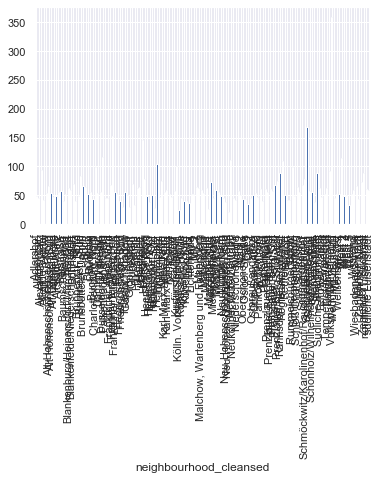

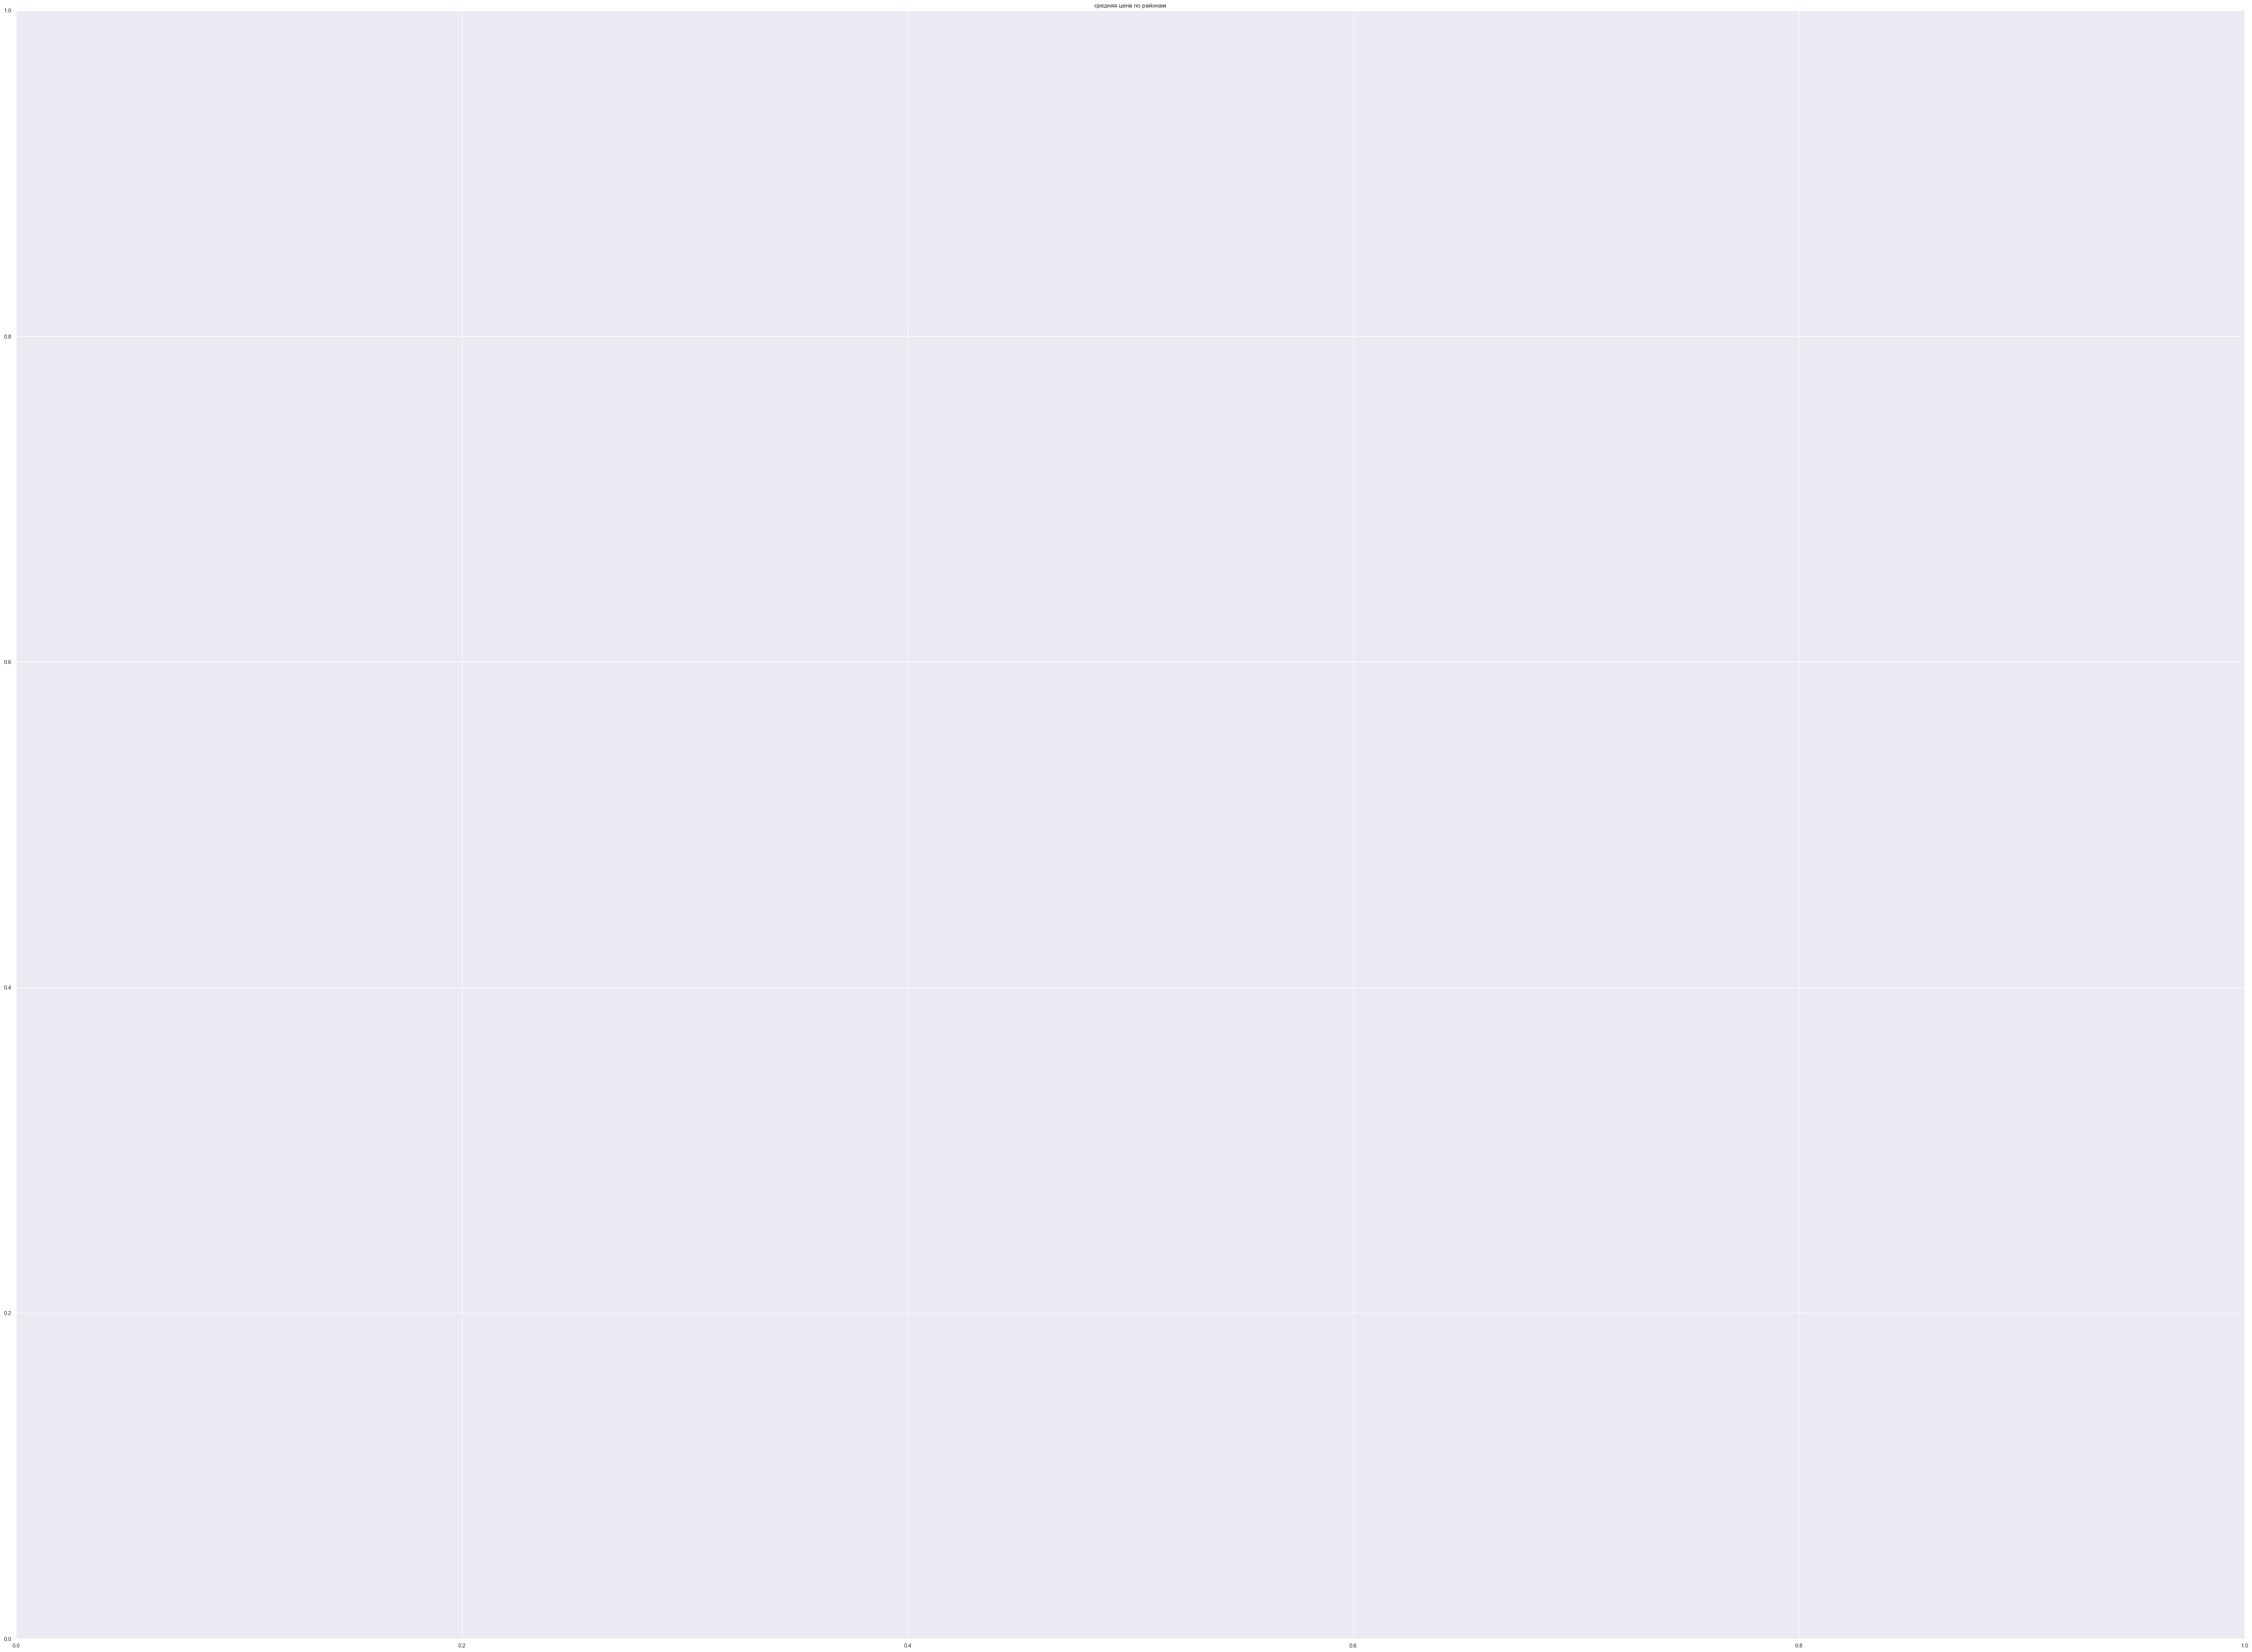

In [102]:
# влияние переменных на цену
avg_price_host = df_listings_summary_selected.groupby("neighbourhood_cleansed").mean()["price"]
avg_price_host.plot(kind="bar")
plt.figure(figsize=(80, 60)) # не получается увеличить
plt.title("средняя ценв по районам")
plt.show()

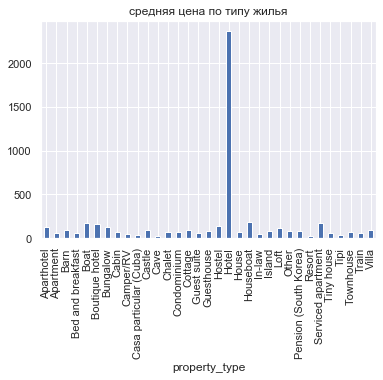

In [103]:
avg_price_host = df_listings_summary_selected.groupby("property_type").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу жилья")
plt.show()

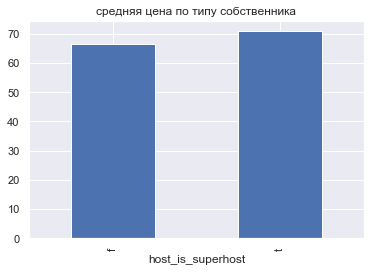

In [104]:
avg_price_host = df_listings_summary_selected.groupby("host_is_superhost").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу собственника")
plt.show()

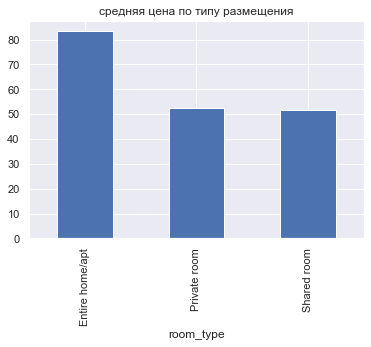

In [105]:
# здесь видно, что влияет на цену только один тип размещения. Целесообразно сделать одну колонку
avg_price_host = df_listings_summary_selected.groupby("room_type").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу размещения")
plt.show()

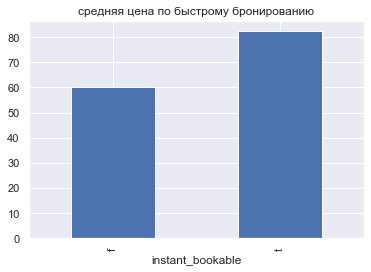

In [106]:
avg_price_host = df_listings_summary_selected.groupby("instant_bookable").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по быстрому бронированию")
plt.show()

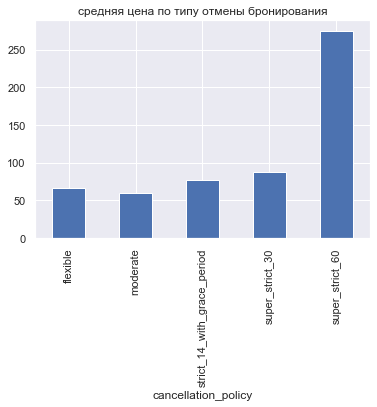

In [107]:
avg_price_host = df_listings_summary_selected.groupby("cancellation_policy").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу отмены бронирования")
plt.show()

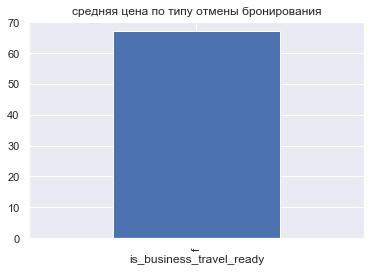

In [108]:
# эта колонка не влияет на цену
avg_price_host = df_listings_summary_selected.groupby("is_business_travel_ready").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу отмены бронирования")
plt.show()

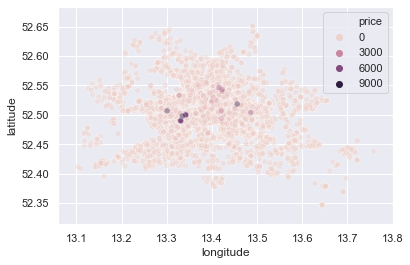

In [109]:
geo = df_listings_summary_selected[['latitude', 'longitude', 'price']]
geo = geo.sort_values("price", ascending=True)  
geo.describe()
sns.scatterplot(x="longitude", 
                y="latitude", 
                hue="price", 
                data=geo, 
                alpha=0.4)

In [110]:
# дальнейшие действия: нужно найти выбросы данных цен, создать новые колонки по наличию/отсутствию услуг или удобств,
# рассчитать удаленность от центра

In [111]:
# находим верхнюю границу цен для 99.5% предложений
print(format(np.percentile(df_listings_summary_selected["price"], 99.5)))

400.0


In [112]:
# оставляем только эти 99.5%, остатки считаем выбросами
df_listings_summary_cleaned = df_listings_summary_selected[(df_listings_summary_selected.price 
                                 <= np.percentile(df_listings_summary_selected["price"],
                                99.5)) & (df_listings_summary_selected.price > 0)]

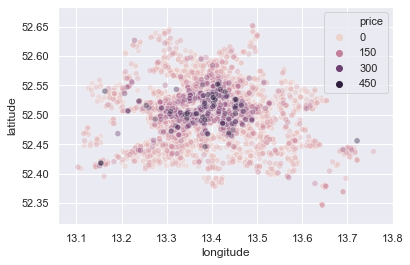

In [113]:
geo = df_listings_summary_cleaned[['latitude', 'longitude', 'price']]
geo = geo.sort_values("price", ascending=True)  
geo.describe()
sns.scatterplot(x="longitude", 
                y="latitude", 
                hue="price", 
                data=geo, 
                alpha=0.4)

In [114]:
conda update -n base -c defaults conda

Solving environment: done

## Package Plan ##

  environment location: /Users/olgakhamtsova/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    altair-3.2.0               |           py37_0         750 KB
    bokeh-2.0.0                |           py37_0         5.2 MB
    bottleneck-1.3.2           |   py37h776bbcc_0         106 KB
    certifi-2019.11.28         |           py37_0         153 KB
    cffi-1.14.0                |   py37hb5b8e2f_0         216 KB
    cfitsio-3.470              |       hb33e7b4_2         823 KB
    click-plugins-1.1.1        |             py_0          11 KB
    cligj-0.5.0                |           py37_0          12 KB
    cloudpickle-1.3.0          |             py_0          30 KB
    conda-4.8.2                |           py37_0         2.8 MB

requests-2.23.0      | 92 KB     | ##################################### | 100% 
tornado-6.0.4        | 597 KB    | ##################################### | 100% 
libssh2-1.9.0        | 250 KB    | ##################################### | 100% 
click-plugins-1.1.1  | 11 KB     | ##################################### | 100% 
dask-2.12.0          | 13 KB     | ##################################### | 100% 
shapely-1.6.4        | 292 KB    | ##################################### | 100% 
pyproj-2.4.1         | 256 KB    | ##################################### | 100% 
_py-xgboost-mutex-2. | 8 KB      | ##################################### | 100% 
json5-0.9.1          | 26 KB     | ##################################### | 100% 
llvmlite-0.31.0      | 11.2 MB   | ##################################### | 100% 
zipp-2.2.0           | 12 KB     | ##################################### | 100% 
mock-4.0.1           | 32 KB     | ##################################### | 100% 
cloudpickle-1.3.0    | 30 KB

In [67]:
conda install -c conda-forge gdal

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/osx-64::boost-cpp==1.70.0=hd59e818_1
done

## Package Plan ##

  environment location: /Users/olgakhamtsova/anaconda3

  added / updated specs:
    - gdal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.69.0           |    h6f8c590_1000        18.6 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    openssl-1.1.1d             |       h0b31af3_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        23.8 MB

The follow

In [34]:
from osgeo import gdal, ogr

In [35]:
osm = ogr.Open('germany-latest.osm.pbf')

In [72]:
conda install -c conda-forge geopandas

Solving environment: done

## Package Plan ##

  environment location: /Users/olgakhamtsova/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cfitsio-3.470              |       h389770f_2         1.4 MB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.5.0                |             py_0           8 KB  conda-forge
    fiona-1.8.11               |   py37heeaa653_0         627 KB
    gdal-3.0.2                 |   py37hbe65578_0         1.6 MB
    geopandas-0.6.2            |             py_0         906 KB  conda-forge
    geos-3.8.0                 |       h0a44026_0         813 KB
    geotiff-1.5.1              |       h0b0f252_0         119 KB
    libgdal-3.0.2              |       h42cfeda_0        17.3 MB
    libspatialindex-1.9.3      |       h0a44026_0         421 KB
    libs

In [36]:
import geopandas as gp

In [38]:
germany = gp.read_file('germany-latest.osm.pbf')

DriverError: unsupported driver: 'OSM'

In [81]:
conda update -n base -c defaults libgeos


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /Users/olgakhamtsova/anaconda3
  package name: libgeos



Note: you may need to restart the kernel to use updated packages.


In [82]:
conda install libdgal

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - libdgal

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [115]:
# Проведем отбор фичей связанных с условиями проживания 
condition = ['property_type', 'room_type', 'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights']

In [116]:
df_listings_summary_cleaned[condition].head()

,property_type,room_type,bed_type,amenities,cleaning_fee,minimum_nights
0,Guesthouse,Entire home/apt,Real Bed,"[TV, Cable TV, Wifi, Kitchen, Gym, Heating, Fa...",30.00,4
1,Apartment,Private room,Real Bed,"[Wifi, Kitchen, Elevator, Heating, Washer, Ess...",0.00,2
2,Apartment,Entire home/apt,Real Bed,"[Internet, Wifi, Kitchen, Buzzer/wireless inte...",50.00,62
3,Apartment,Private room,Pull-out Sofa,"[Internet, Wifi, Pets allowed, Pets live on th...",30.00,5
4,Apartment,Private room,Real Bed,"[Wifi, Heating, Family/kid friendly, Essential...",0.00,2


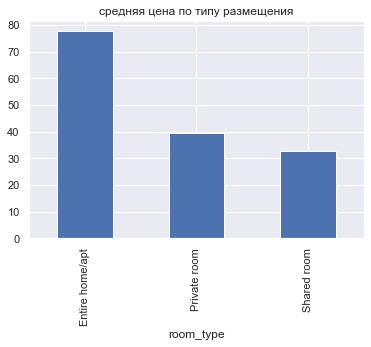

In [117]:
# Средняя стоимость по колонке room_type (тип размещения). Стоимость значительно выше только по одному типу размещения.
avg_price = df_listings_summary_cleaned.groupby("room_type").mean()["price"]
avg_price.plot(kind="bar")
plt.title("средняя цена по типу размещения")
plt.show()

In [118]:
# Сделаем одну колонку
selected = []
df_listings_summary_cleaned["is_entire_apt"] = df_listings_summary_cleaned["room_type"]=="Entire home/apt"
selected.append("is_entire_apt")

/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
selected

['is_entire_apt']

In [120]:
# Посмотрим на колонку bed_type. Почти все значения в этой колонке относятся к типу Real Bed,
# соответственно это не оказывает влияния на цену
df_listings_summary_cleaned["bed_type"].value_counts()

Real Bed         21659
Pull-out Sofa      449
Futon              240
Couch               70
Airbed              23
Name: bed_type, dtype: int64

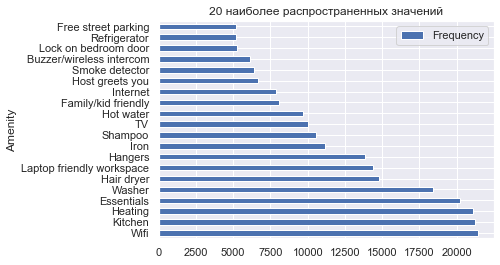

In [121]:
amenity_types = []
for i in df_listings_summary_cleaned["amenities"]:
    amenity_types += i
freq = dict((x, amenity_types.count(x)) for x in set(amenity_types))
freq = pd.DataFrame.from_dict(freq, orient="index")
freq.reset_index(inplace=True)
freq.columns = ["Amenity", "Frequency"]
freq = freq.sort_values(by="Frequency", ascending=False)
freq.head(20).plot.barh(x="Amenity", y="Frequency")
plt.title("20 наиболее распространенных значений")
plt.show()

In [122]:
freq.head(20)

,Amenity,Frequency
35,Wifi,21413
11,Kitchen,21255
57,Heating,21111
6,Essentials,20236
56,Washer,18428
27,Hair dryer,14811
122,Laptop friendly workspace,14387
31,Hangers,13832
24,Iron,11134
125,Shampoo,10586


In [123]:
df_listings_summary_cleaned["amenities"].head()

0    [TV, Cable TV, Wifi, Kitchen, Gym, Heating, Fa...
1    [Wifi, Kitchen, Elevator, Heating, Washer, Ess...
2    [Internet, Wifi, Kitchen, Buzzer/wireless inte...
3    [Internet, Wifi, Pets allowed, Pets live on th...
4    [Wifi, Heating, Family/kid friendly, Essential...
Name: amenities, dtype: object

In [124]:
# Почти во всех позициях присутствуют три самых распространенных эемента: Wifi, Kitchen, Heating. 
# Влияния на стоимость не оказывают

In [125]:
# Выберем те значения, которые встречаются в более чем половине случаев
df_listings_summary_cleaned["hair_dryer"] = df_listings_summary_cleaned["amenities"].apply(lambda x: '"Hair dryer"' in x)
df_listings_summary_cleaned["lap_friendly"] = df_listings_summary_cleaned["amenities"].apply(lambda x: '"Laptop friendly workspace"' in x)
df_listings_summary_cleaned["Washer"] = df_listings_summary_cleaned["amenities"].apply(lambda x: "Washer" in x)
for i in ["hair_dryer", "lap_friendly", "Washer"]:
    selected.append(i)

/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [126]:
selected

['is_entire_apt', 'hair_dryer', 'lap_friendly', 'Washer']

In [127]:
# Статистика по колонке minimum_nights
df_listings_summary_cleaned["minimum_nights"].describe()

count    22441.000000
mean         7.167105
std         40.750941
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max       5000.000000
Name: minimum_nights, dtype: float64

In [128]:
# Проверим как влияет на стоимость количество минимальных ночевок
df_listings_summary_cleaned["minimum_nights_more_1"] = df_listings_summary_cleaned["minimum_nights"].apply(lambda x: 'True' if x > 1 else 'False')
selected.append("minimum_nights_more_1")

/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


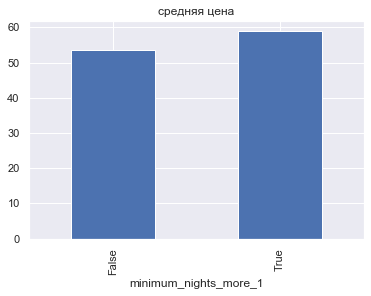

In [129]:
# Средняя цена предложений, которые запрашивают более одной ночевки выше. Включим такую олонку в нашу модель
avg_price_nights = df_listings_summary_cleaned.groupby("minimum_nights_more_1").mean()["price"]
avg_price_nights.plot(kind="bar")
plt.title("средняя цена")
plt.show()

In [130]:
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1']

/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


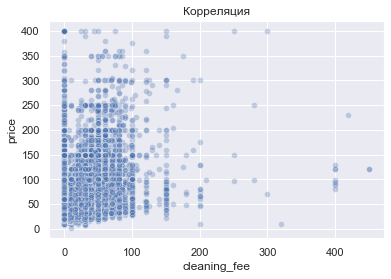

корреляция Пирсона между коллонкой cleaning_fee и стоимостью =  0.4041  p-value =  0.0000.


In [131]:
from scipy import stats
df_listings_summary_cleaned["cleaning_fee"] = df_listings_summary_cleaned["cleaning_fee"].astype("float")
df_listings_summary_cleaned["cleaning_fee"].describe()
sns.scatterplot(x="cleaning_fee", y="price", data=df_listings_summary_cleaned, alpha=0.3)
plt.title("Корреляция")
plt.show()
print("корреляция Пирсона между коллонкой cleaning_fee и стоимостью = {0[0]: .4f}  p-value = {0[1]: .4f}.".format(stats.pearsonr(df_listings_summary_cleaned["cleaning_fee"], 
                                                                                            df_listings_summary_cleaned["price"])))

In [132]:
# Включим колонку cleaning_fee в модель, т. к. она коррелирует со стоимостью
selected.append("cleaning_fee")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee']

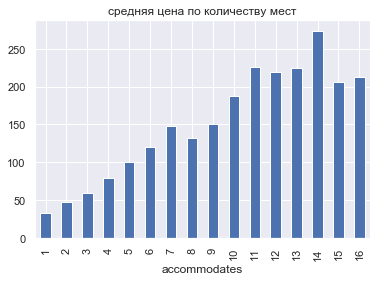

In [133]:
# Посмотрим как влияет на стоимость размер жилья. В качестве показателя размера выберем колонку accommodates
df_listings_summary_cleaned.groupby("accommodates").mean()["price"].plot(kind="bar")
plt.title("средняя цена по количеству мест")
plt.show()

In [134]:
# Размер определенно оказывает влияние на стоимость. Включим этот показатель в модель
selected.append("accommodates")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates']

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1648, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


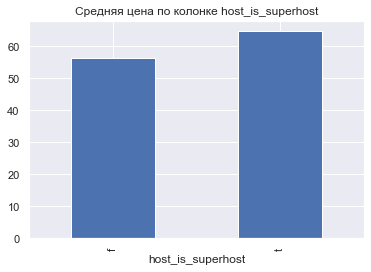

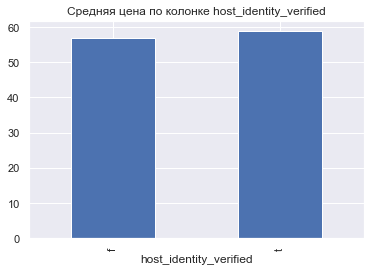

In [135]:
# Проверим влияние характеристик собственника жилья на стоимость
host = ["host_is_superhost", "host_identity_verified"]
df_listings_summary_cleaned.describe(include="all")[host]
for col in host:
    avg_price_host = df_listings_summary_cleaned.groupby(col).mean()["price"]
    avg_price_host.plot(kind="bar")
    plt.title("Средняя цена по колонке "+col)
    plt.show()


In [136]:
# Включим данные характеристик собственника в нашу модель, т.к. заметна зависимость цены от этого типа данных
selected.append("host_is_superhost")
selected.append("host_identity_verified")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates',
 'host_is_superhost',
 'host_identity_verified']

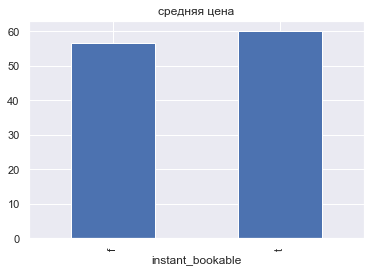

In [137]:
# Средняя цена предложений по признаку мгновенного бронирования.
avg_price_bookable = df_listings_summary_cleaned.groupby("instant_bookable").mean()["price"]
avg_price_bookable.plot(kind="bar")
plt.title("средняя цена")
plt.show()

In [138]:
# Данные о мгновенном бронировании так же включим в модель
selected.append("instant_bookable")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates',
 'host_is_superhost',
 'host_identity_verified',
 'instant_bookable']

In [139]:
# Статистика по правилам отмены бронирования:
print(df_listings_summary_cleaned["cancellation_policy"].value_counts())

flexible                       9051
moderate                       7075
strict_14_with_grace_period    6253
super_strict_30                  50
super_strict_60                  12
Name: cancellation_policy, dtype: int64


In [140]:
# Очевидно, что предложений с суперстрогими правилами отмены значительно меньше. 
# Из этого следует, что стоимость будет зависеть от гибкости или не гибкости правила отмены
df_listings_summary_cleaned["cancellation_not_flexible"] = df_listings_summary_cleaned["cancellation_policy"]!="flexible"
df_listings_summary_cleaned["cancellation_not_flexible"].value_counts()
selected.append("cancellation_not_flexible")
selected

/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates',
 'host_is_superhost',
 'host_identity_verified',
 'instant_bookable',
 'cancellation_not_flexible']

In [141]:
df_listings_summary_cleaned[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22441 entries, 0 to 22551
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   is_entire_apt              22441 non-null  bool   
 1   hair_dryer                 22441 non-null  bool   
 2   lap_friendly               22441 non-null  bool   
 3   Washer                     22441 non-null  bool   
 4   minimum_nights_more_1      22441 non-null  object 
 5   cleaning_fee               22441 non-null  float64
 6   accommodates               22441 non-null  int64  
 7   host_is_superhost          22441 non-null  object 
 8   host_identity_verified     22441 non-null  object 
 9   instant_bookable           22441 non-null  object 
 10  cancellation_not_flexible  22441 non-null  bool   
dtypes: bool(5), float64(1), int64(1), object(4)
memory usage: 1.3+ MB


In [142]:
# Преобразование величин:
df_listings_summary_cleaned["host_is_superhost"] = df_listings_summary_cleaned["host_is_superhost"]=="t"
df_listings_summary_cleaned["host_identity_verified"] = df_listings_summary_cleaned["host_identity_verified"]=="t"
df_listings_summary_cleaned["instant_bookable"] = df_listings_summary_cleaned["instant_bookable"]=="t"
df_listings_summary_cleaned["minimum_nights_more_1"] = df_listings_summary_cleaned["minimum_nights_more_1"]=="t"

/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [143]:
df_listings_summary_cleaned[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22441 entries, 0 to 22551
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   is_entire_apt              22441 non-null  bool   
 1   hair_dryer                 22441 non-null  bool   
 2   lap_friendly               22441 non-null  bool   
 3   Washer                     22441 non-null  bool   
 4   minimum_nights_more_1      22441 non-null  bool   
 5   cleaning_fee               22441 non-null  float64
 6   accommodates               22441 non-null  int64  
 7   host_is_superhost          22441 non-null  bool   
 8   host_identity_verified     22441 non-null  bool   
 9   instant_bookable           22441 non-null  bool   
 10  cancellation_not_flexible  22441 non-null  bool   
dtypes: bool(9), float64(1), int64(1)
memory usage: 723.2 KB


In [353]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/olgakhamtsova/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.21.0         | 58 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [354]:
from geopy.geocoders import Nominatim

In [356]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /Users/olgakhamtsova/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.0.1-py_0
  branca             conda-forge/noarch::branca-0.3.1-py_0
  folium      

In [357]:
import folium

In [386]:
lat = 52.509
long = 13.381
base = folium.Map(location=[lat,long], zoom_start=12) 
base

In [387]:
POI = folium.map.FeatureGroup()

In [388]:
lat_long_list = [[52.525293,13.369359],[52.558794,13.288437],[52.516497,13.377683],
                 [52.517693,13.402141],[52.518770,13.376166]]

In [77]:
# Отобразим на карте города наиболее важные для туристов места, 
# такие как центр города, ж/д станция, аэропорт, основные достопримечательности

In [389]:
for i in range(0,len(lat_long_list)):
    POI.add_child(
        folium.CircleMarker(
        lat_long_list[i],
        radius = 16,
        color='yellow',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
        )
    )
base.add_child(POI)

In [363]:
toploc = {"hbf": [52.525293, 13.369359], 
          "txl": [52.558794, 13.288437], 
          "btor": [52.516497, 13.377683], 
          "museum": [52.517693, 13.402141], 
          "reichstag": [52.518770, 13.376166]}

In [ ]:
# Далее разместим на карте 100 самых дорогих предложений по проживанию

In [377]:
df_listings_summary_cleaned.sort_values(by='price',ascending=False,axis=0,inplace=True)

In [378]:
df_top100 = df_listings_summary_cleaned.head(100)

In [390]:
for inc_lat,inc_long in zip(df_top100.longitude,df_top100.latitude):
    POI.add_child(
    folium.CircleMarker(
    [inc_long,inc_lat],
    radius = 6,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.6
    )
)
base.add_child(POI)

In [78]:
# Можно заметить, что самые дорогие квартиры расположены в центральных районах города. Вблизи аэропорта дорогих квартир нет

In [ ]:
# Выберем 5 районов, в которых находится большее количество дорогих предложений. 
# Будем считать, что это наиболее привлекательные для туристов места проживания.

In [392]:
df_top100['neighbourhood_group_cleansed'].value_counts().reset_index()

,index,neighbourhood_group_cleansed
0,Mitte,31
1,Friedrichshain-Kreuzberg,20
2,Charlottenburg-Wilm.,13
3,Tempelhof - Schöneberg,10
4,Pankow,10
5,Neukölln,8
6,Treptow - Köpenick,3
7,Steglitz - Zehlendorf,3
8,Spandau,1
9,Lichtenberg,1


In [144]:
df_listings_summary_cleaned["good_location"] = df_listings_summary_cleaned["neighbourhood_group_cleansed"].apply(lambda x: 'True' if x in ["Mitte", "Friedrichshain-Kreuzberg", "Charlottenburg-Wilm.", "Tempelhof - Schöneberg", "Pankow"] else 'False')

/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
df_listings_summary_cleaned.head()

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bedrooms,bed_type,amenities,price,...,host_is_superhost,latitude,longitude,is_entire_apt,hair_dryer,lap_friendly,Washer,minimum_nights_more_1,cancellation_not_flexible,good_location
0,2015,Brunnenstr. Süd,Mitte,Guesthouse,Entire home/apt,3,1.0,Real Bed,"[TV, Cable TV, Wifi, Kitchen, Gym, Heating, Fa...",60.0,...,True,52.534537,13.402557,True,False,False,False,False,True,True
1,2695,Prenzlauer Berg Nordwest,Pankow,Apartment,Private room,2,1.0,Real Bed,"[Wifi, Kitchen, Elevator, Heating, Washer, Ess...",17.0,...,False,52.548513,13.404553,False,False,False,True,False,False,True
2,3176,Prenzlauer Berg Südwest,Pankow,Apartment,Entire home/apt,4,1.0,Real Bed,"[Internet, Wifi, Kitchen, Buzzer/wireless inte...",90.0,...,False,52.534996,13.417579,True,False,False,True,False,True,True
3,3309,Schöneberg-Nord,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,Pull-out Sofa,"[Internet, Wifi, Pets allowed, Pets live on th...",26.0,...,False,52.498855,13.349065,False,False,False,True,False,True,True
4,7071,Helmholtzplatz,Pankow,Apartment,Private room,2,1.0,Real Bed,"[Wifi, Heating, Family/kid friendly, Essential...",42.0,...,True,52.543157,13.415091,False,False,False,False,False,True,True


In [79]:
# Внесем колонке о месторасположении в нашу модель

In [146]:
selected.append("good_location")
selected

['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates',
 'host_is_superhost',
 'host_identity_verified',
 'instant_bookable',
 'cancellation_not_flexible',
 'good_location']

In [147]:
df_listings_summary_cleaned[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22441 entries, 0 to 22551
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   is_entire_apt              22441 non-null  bool   
 1   hair_dryer                 22441 non-null  bool   
 2   lap_friendly               22441 non-null  bool   
 3   Washer                     22441 non-null  bool   
 4   minimum_nights_more_1      22441 non-null  bool   
 5   cleaning_fee               22441 non-null  float64
 6   accommodates               22441 non-null  int64  
 7   host_is_superhost          22441 non-null  bool   
 8   host_identity_verified     22441 non-null  bool   
 9   instant_bookable           22441 non-null  bool   
 10  cancellation_not_flexible  22441 non-null  bool   
 11  good_location              22441 non-null  object 
dtypes: bool(9), float64(1), int64(1), object(1)
memory usage: 898.5+ KB


In [148]:
# Преобразуем значения:

In [149]:
df_listings_summary_cleaned["good_location"] = df_listings_summary_cleaned["good_location"]=="t"

/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
for col in df_listings_summary_cleaned[selected].select_dtypes("bool").columns:
    df_listings_summary_cleaned[col] = df_listings_summary_cleaned[col].astype("int")

/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
df_listings_summary_cleaned[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22441 entries, 0 to 22551
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   is_entire_apt              22441 non-null  int64  
 1   hair_dryer                 22441 non-null  int64  
 2   lap_friendly               22441 non-null  int64  
 3   Washer                     22441 non-null  int64  
 4   minimum_nights_more_1      22441 non-null  int64  
 5   cleaning_fee               22441 non-null  float64
 6   accommodates               22441 non-null  int64  
 7   host_is_superhost          22441 non-null  int64  
 8   host_identity_verified     22441 non-null  int64  
 9   instant_bookable           22441 non-null  int64  
 10  cancellation_not_flexible  22441 non-null  int64  
 11  good_location              22441 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.2 MB


In [152]:
# Выполним стандартизацию значений:

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledFeatures = sc.fit_transform(df_listings_summary_cleaned[selected])

In [81]:
# В качестве алгоритма машинного обучения выберем алгоритм Xgboost

In [73]:
import xgboost as xgb

In [74]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
X = scaledFeatures
y = df_listings_summary_cleaned["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Найдем лучшие параметры для алгоритма XGBoost при помощи метода Grid Search CV:
xgb_clf = xgb.XGBRegressor()
parameters = {'n_estimators': [120, 100, 140], 'max_depth':[3,5,7,9]}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

[23:54:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'max_depth': 5, 'n_estimators': 100}


In [82]:
# Применим найденные параметры к алгоритму
xgb_clf = xgb.XGBRegressor(n_estimators=100, max_depth=5)
xgb_clf.fit(X_train, y_train)
y_test_pred = xgb_clf.predict(X_test)
print("R^2 score: {0: .4f}".format(r2_score(y_test, y_test_pred)))
print("RMSE: {0: .4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

[00:20:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 score:  0.4694
RMSE:  31.2126


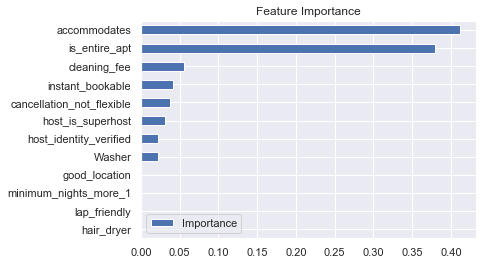

In [83]:
# Посмотрим на влиятельность факторов на целевую переменную (цену):
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=selected)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).plot(kind="barh")
plt.title("Feature Importance")
plt.show()

In [ ]:
# Наиболее влиятельные факторы - это тип жилья и количество гостей, которое оно вмещает.

In [12]:
# В целях улучшения качества модели попробуем создать дополнительные признаки. 

In [14]:
# В предыдущей модели за размер квартиры отвечала переменная accomodates.
# Попробуем определить размер квартир точнее, например в квадратных метрах

In [153]:
df_listings_summary['square_feet'].head()

0      NaN
1      NaN
2    720.0
3      0.0
4      NaN
Name: square_feet, dtype: float64

In [154]:
# Колонка square_feet не дает необходимой информации, т.к. содержит много пропущенных значений
df_listings_summary.square_feet.isna().sum()

22106

In [155]:
# Колонка description может содержать информацию о площади
df_listings_summary.description.isna().sum()

203

In [156]:
# Извлечем возможные значения площади
df_listings_summary['size'] = df_listings_summary['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
df_listings_summary['size'] = df_listings_summary['size'].str.replace("\D", "")
df_listings_summary['size'] = df_listings_summary['size'].astype(float)

In [157]:
df_listings_summary['size'].isna().sum()

11794

In [158]:
# Не все значения удалось заполнить с помощью текста описания
df_listings_summary[['description', 'size']].head(10)

,description,size
0,Great location! 30 of 75 sq meters. This wood...,75.0
1,In the summertime we are spending most of our ...,25.0
2,This beautiful first floor apartment is situa...,68.0
3,First of all: I prefer short-notice bookings. ...,26.0
4,Cozy and large room in the beautiful district ...,20.0
5,4 bedroom with very large windows and outstand...,780.0
6,The apartment is located on the upper second f...,NaN
7,Hello future guests! We want to rent our cute ...,55.0
8,Light and sunny 2-Room-turn of the century-fla...,80.0
9,The 25 sqm room is located in the heart of Ber...,25.0


In [159]:
print (round(df_listings_summary['size'].isna().sum()/len(df_listings_summary),3), '%')

0.523 %


In [163]:
df_listings_summary["cleaning_fee"] = df_listings_summary["cleaning_fee"].astype("float")
df_listings_summary["security_deposit"] = df_listings_summary["security_deposit"].astype("float")
df_listings_summary["extra_people"] = df_listings_summary["extra_people"].astype("float")

In [170]:
df_listings_summary["bathrooms"].fillna(1.0, inplace=True)
df_listings_summary["bathrooms"].isna().any()

False

In [171]:
# Чтобы не потерять значительную часть полезной информации, не будем избавляться от пропущенных значений.
# Заполним их значениями, полученными с помощью алгоритма машинного обучения. Для этого используем только численные значения
sub_df = df_listings_summary[['accommodates', 'bathrooms', 'bedrooms',  'price', 'cleaning_fee', 
                 'security_deposit', 'extra_people', 'guests_included', 'size']]

In [172]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   accommodates      22552 non-null  int64  
 1   bathrooms         22552 non-null  float64
 2   bedrooms          22552 non-null  float64
 3   price             22552 non-null  float64
 4   cleaning_fee      22552 non-null  float64
 5   security_deposit  22552 non-null  float64
 6   extra_people      22552 non-null  float64
 7   guests_included   22552 non-null  int64  
 8   size              10758 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.5 MB


In [173]:
train_data = sub_df[sub_df['size'].notnull()]
test_data  = sub_df[sub_df['size'].isnull()]

In [174]:
X_train = train_data.drop('size', axis=1)
X_test  = test_data.drop('size', axis=1)

In [175]:
y_train = train_data['size']

In [176]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
y_test = lg.predict(X_test)

In [179]:
# Теперь когда у нас есть значения площади преобразуем y_test в датасет
y_test = pd.DataFrame(y_test)
y_test.columns = ['size']
print(y_test.shape)
y_test.head()

(11794, 1)


,size
0,47.854228
1,85.252224
2,77.711690
3,84.120831
4,56.505823


In [180]:
print(X_test.shape)
X_test.head()

(11794, 8)


,accommodates,bathrooms,bedrooms,price,cleaning_fee,security_deposit,extra_people,guests_included
6,2,1.0,0.0,70.0,0.0,500.0,0.0,1
11,4,1.0,2.0,129.0,49.0,500.0,24.0,2
12,4,1.0,1.0,70.0,40.0,500.0,18.0,2
13,4,1.0,2.0,98.0,50.0,300.0,25.0,2
19,2,1.0,0.0,70.0,0.0,1660.0,0.0,1


In [181]:
new_test_data = pd.concat([X_test, y_test], axis=1)

In [183]:
print(new_test_data.shape)
new_test_data.head()

(17561, 9)


,accommodates,bathrooms,bedrooms,price,cleaning_fee,security_deposit,extra_people,guests_included,size
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.854228
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.252224
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.711690
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.120831
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.505823
